<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analysis and Prediction of HDB Resale Flat Price

## Contents:
- [Data Dictionary](#Data-Dictionary-for-'cleaned_train'-dataset)
- [Exploratory Data Analysis](#EDA)
    - [Part 1: Overall dataset](#Part-1:-Overall-dataset)
    - [Part 2.1: Flat attributes](#Part-2.1:-Flat-attributes)
    - [Part 2.2: Location](#Part-2.2:-Location)
    - [Part 2.3: Nearby amenities](#Part-2.3:-Nearby-amenities)
    - [Part 2.4: Accessibility](#Part-2.4:-Accessibility)
    - [Part 2.5: Nearby Primary Schools](#Part-2.5:-Nearby-Primary-Schools)

## Data Dictionary for 'cleaned_train' dataset
only include features we have performed EDA, and selected for final model

|Feature|Type|Description|
|---|---|:---|
|**id**|*integer*|unique id for each transaction|
|**tranc_yearmonth**|*string*|year and month of the resale transaction, e.g. 2015-02|
|**town**|*string*|HDB township where the flat is located, e.g. BUKIT MERAH|
|**flat_type**|*string*|type of the resale flat unit, e.g. 3 ROOM|
|**storey_range**|*string*|floor level (range) of the resale flat unit, e.g. 07 TO 09|
|**floor_area_sqm**|*float*|floor area of the resale flat unit in square metres|
|**flat_model**|*string*|HDB model of the resale flat, e.g. Multi Generation|
|**lease_commence_date**|*integer*|commencement year of the flat unit's 99-year lease|
|**resale_price**|*float*|the property's sale price in Singapore dollars|
|**tranc_year**|*integer*|year of resale transaction|
|**tranc_month**|*integer*|month of resale transaction|
|**lower**|*integer*|lower value of storey_range|
|**upper**|*integer*|upper value of storey_range|
|**mid**|*integer*|middle value of storey_range|
|**full_flat_type**|*string*|combination of flat_type and flat_model|
|**hdb_age**|*integer*|number of years from lease_commence_date to present year|
|**max_floor_lvl**|*integer*|highest floor of the resale flat|
|**year_completed**|*integer*|year which construction was completed for resale flat||
|**postal**|*string*|postal code of the resale flat block|
|**latitude**|*float*|Latitude based on postal code|
|**longitude**|*float*|Longitude based on postal code|
|**mall_nearest_distance**|*float*|distance (in metres) to the nearest mall|
|**mall_within_500m**|*float*|number of malls within 500 metres|
|**mall_within_1km**|*float*|number of malls within 1 kilometre|
|**mall_within_2km**|*float*|number of malls within 2 kilometre|
|**hawker_nearest_distance**|*float*|distance (in metres) to the nearest hawker centre|
|**hawker_within_500m**|*float*|number of hawker centres within 500 metres|
|**hawker_within_1km**|*float*|number of hawker centres within 1 kilometre|
|**hawker_within_2km**|*float*|number of hawker centres within 2 kilometre|
|**hawker_food_stalls**|*integer*|number of hawker food stalls in the nearest hawker centre|
|**mrt_nearest_distance**|*float*|distance (in metres) to the nearest MRT station|
|**mrt_name**|*string*|name of the nearest MRT station|
|**mrt_latitude**|*float*|latitude (in decimal degrees) of the the nearest MRT station|
|**mrt_longitude**|*float*|longitude (in decimal degrees) of the nearest MRT station|
|**bus_stop_nearest_distance**|*float*|distance (in metres) to the nearest bus stop|
|**bus_stop_name**|*string*|name of the nearest bus stop|
|**bus_stop_latitude**|*float*|latitude (in decimal degrees) of the the nearest bus stop|
|**bus_stop_longitude**|*float*|longitude (in decimal degrees) of the nearest bus stop|
|**pri_sch_nearest_distance**|*float*|distance (in metres) to the nearest primary school|
|**pri_sch_name**|*string*|name of the nearest primary school|
|**pri_sch_latitude**|*float*|latitude (in decimal degrees) of the the nearest primary school|
|**pri_sch_longitude**|*float*|longitude (in decimal degrees) of the nearest primary school|
|**postal_sector**|*integer*|first two digits of postal code|
|**dist_CBD**|*float*|distance (in metres) to Raffles Place MRT|

## EDA
The following codes are for exploratory visualisation.

In [1]:
# Import all the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Set option to show all columns and rows and in dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read in the cleaned_train dataset into dataframe
df = pd.read_csv("../datasets/cleaned_train.csv")

In [4]:
# Datatype of postal to be changed to string for dummification

df["postal"] = df["postal"].astype("str")

### Part 1: Overall dataset

In [5]:
# Summary statistics of numeric variables in our cleaned dataset.
df.describe()

,id,floor_area_sqm,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,postal_sector,dist_CBD
count,149742.000000,149742.000000,149742.000000,1.497420e+05,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.0,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.00000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000
mean,92855.241362,97.222615,1992.315576,4.486662e+05,2016.466763,6.586923,8.263173,7.226523,9.299822,8.263173,1046.504227,433.489815,28.684424,15.108012,1990.788677,1.0,0.191890,0.000100,0.000280,0.000755,124.599411,0.13964,1.766358,39.293558,49.921846,26.296637,5.975999,0.024115,0.431235,0.063990,0.626090,0.059603,0.000341,1.366179,103.839328,664.426314,0.489883,1.796223,5.197186,1167.571392,0.490397,1.409912,3.802580,48.704432,58.310133,764.154674,0.545071,0.261309,1.365614,103.839342,115.201164,1.366187,103.839308,394.967802,55.301031,0.113235,1.366217,103.839046,507.652819,210.125095,0.031902,1.365940,103.839274,55.252407,12377.719617
std,53639.094344,24.441882,12.042246,1.432380e+05,2.742201,3.339657,5.482516,5.489519,5.481949,5.482516,263.092422,104.177214,12.042246,6.195127,12.103972,0.0,0.393788,0.010008,0.016745,0.027460,58.317803,5.96565,11.688068,68.868183,45.240904,33.491971,19.183276,1.138859,5.212640,2.034205,11.226896,0.669194,0.024377,0.042871,0.072514,368.678327,0.729694,1.421096,3.470181,1071.120967,0.767238,1.711613,4.009482,19.152557,55.515556,429.109023,0.497966,0.439350,0.042577,0.072591,55.568108,0.042886,0.072527,234.207186,17.879847,0.316881,0.042692,0.072642,308.813798,20.005456,0.175739,0.042622,0.072640,18.732979,4467.364952
min,1.000000,31.000000,1966.000000,1.500000e+05,2012.000000,1.000000,2.000000,1.000000,3.000000,2.000000,333.684000,205.108901,3.000000,2.000000,1949.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270380,103.685228,34.265581,0.000000,0.000000,0.000000,1.873295,0.000000,0.000000,0.000000,0.000000,0.000000,21.971410,0.000000,0.000000,1.265982,103.697143,9.001285,1.270759,103.684206,45.668324,20.000000,0.000000,1.274962,103.687724,38.913475,188.000000,0.000000,1.276029,103.687207,5.000000,587.180417
25%,46233.250000,75.000000,1984.000000,3.460000e+05,2014.000000,4.000000,5.000000,4.000000,6.000000,5.000000,807.300000,364.676062,20.000000,12.000000,1983.000000,1.0,0.000000,0.000000,0.000000,0.000000,90.000000,0.00000,0.000000,

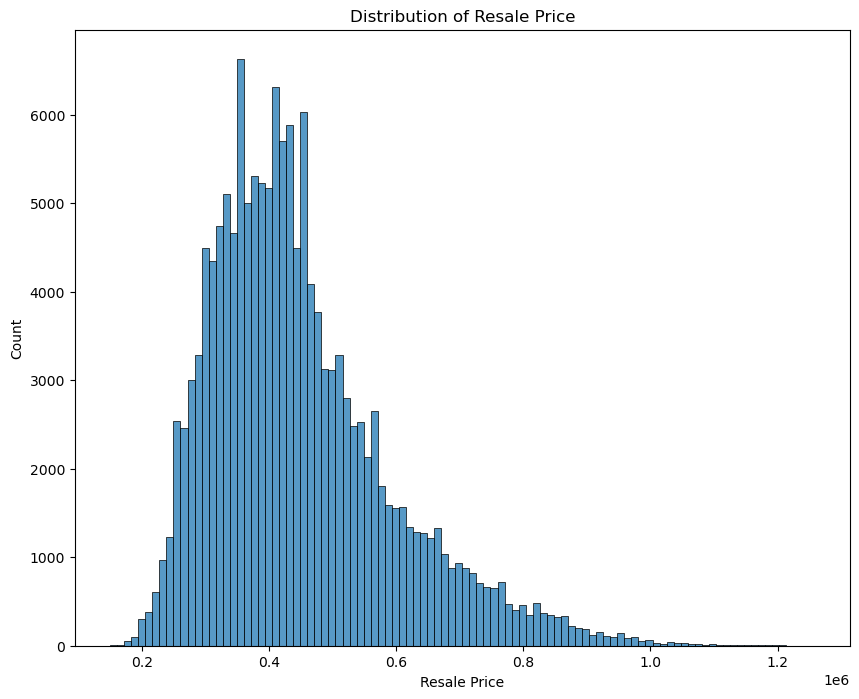

In [6]:
# Distribution of resale price

# Set the figure size
plt.figure(figsize=(10,8))

# Create the histogram
sns.histplot(data=df,x="resale_price", bins=100)

# Add labels and titles
plt.xlabel('Resale Price')
plt.ylabel('Count')
plt.title("Distribution of Resale Price")

# Set the x-axis font size
#plt.xticks(fontsize=7, rotation=90)

# Show the plot
plt.show()

The distribution of resale price is normally distributed, just slightly skewed to the right. With the large sample size of 149742, we can still apply linear regression to model the relationship between our response variable and the features. 

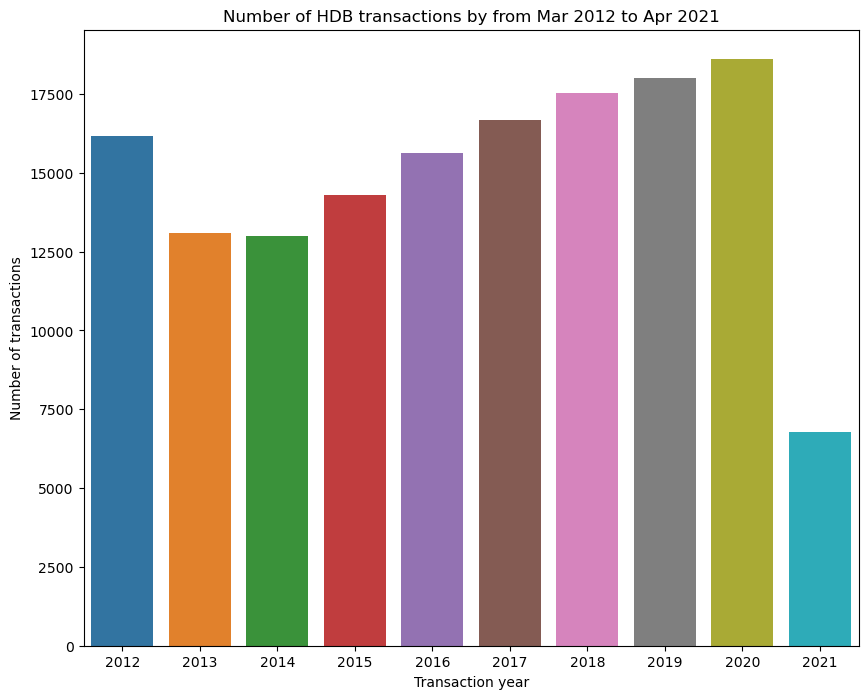

In [37]:
# Number of HDB transactions over the years

plt.figure(figsize=(10,8))
avg_transaction_per_year = len(df)/10
sns.countplot(x="tranc_year", data=df)
plt.ylabel('Number of transactions')
plt.xlabel('Transaction year')
plt.title('Number of HDB transactions by from Mar 2012 to Apr 2021')
plt.show()

The demand for HDB in the resale market remained high with increased number of transactions in the past five years, unaffected by the  COVID-19 situation in 2020. 
<br>The number of transactions in 2021 appeared low as the available data was only up till April and not for the full year. 

Based on our domain knowledge and research, there are 5 key areas that may affect resale price:
1) Flat attributes
2) Location
3) Nearby amenities
4) Accessibility (transport)
5) Nearby primary schools

As such, to streamline the analysis process, we conducted EDA for each of these areas, where each area consists of their respective features from the dataframe which we are interested to further explore.

### Part 2.1: Flat attributes
- flat_model
- flat_type
- full_flat_type
- hdb_age
- floor_area_sqm
- floor_area_sqft
- lease_commence_date
- year_completed
- mid_storey
- mid
- storey_range
- tranc_year

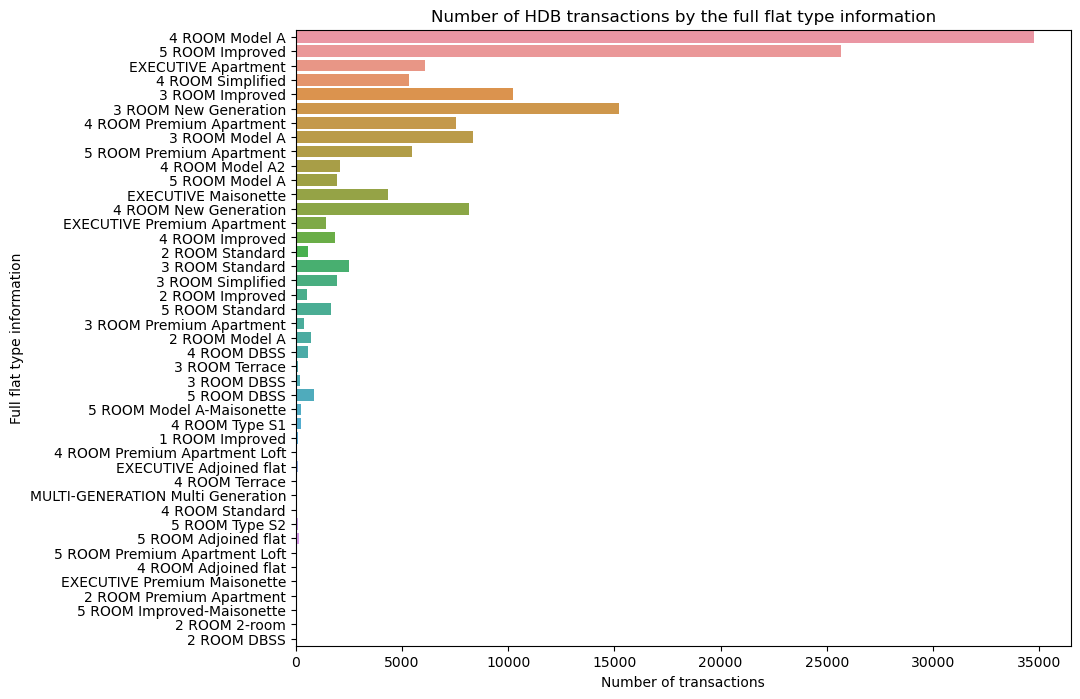

In [8]:
# Number of HDB transactions by full flat type

plt.figure(figsize=(10,8))

sns.countplot(y="full_flat_type", data=df)
plt.xlabel('Number of transactions')
plt.ylabel('Full flat type information')
plt.title('Number of HDB transactions by the full flat type information');

From the count of HDB transactions, we can see that the top three number HDB transactions were from the 4 room Model A, 5 room Improved model and 3 room new generation.

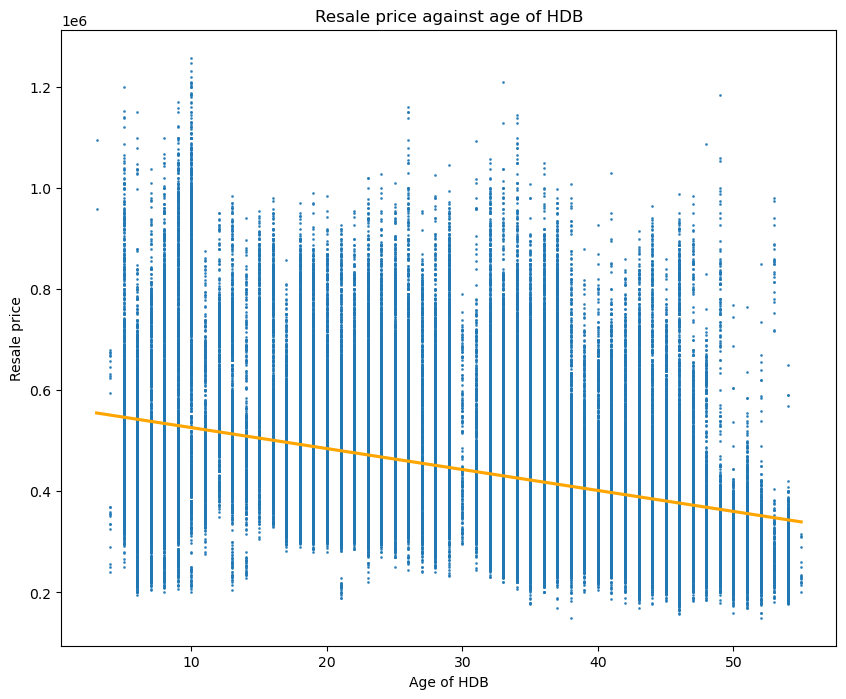

In [9]:
# Resale price against age of HDB

plt.figure(figsize=(10,8))

sns.regplot(data = df, x="hdb_age",y="resale_price", ci = None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})
plt.xlabel('Age of HDB')
plt.ylabel('Resale price')
plt.title('Resale price against age of HDB');

The age of HDB has a negative correlation with the resale price. This suggests that older HDB flats tend to transact at a lower price. 

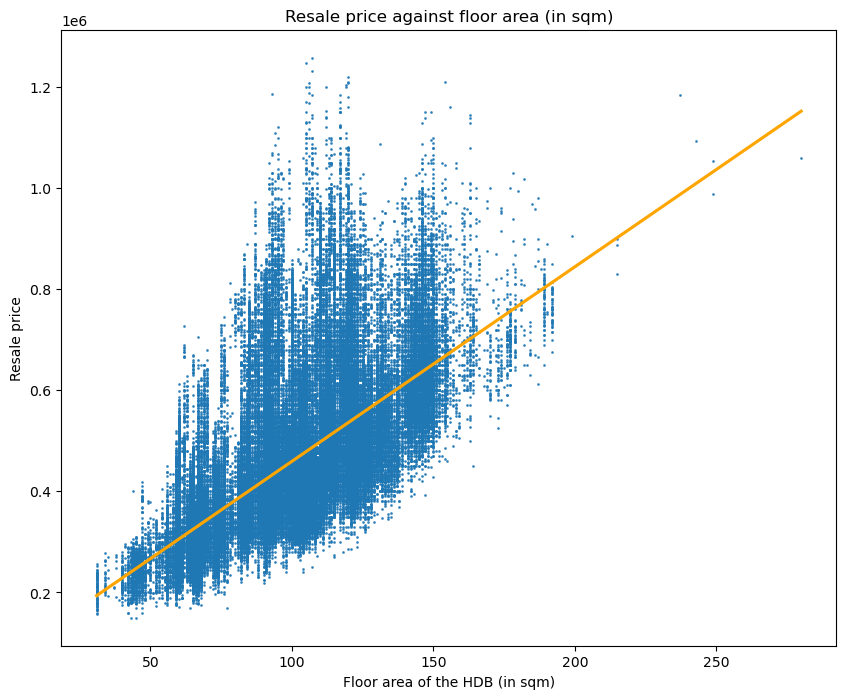

In [10]:
# Resale price against floor area. 

plt.figure(figsize=(10,8))

sns.regplot(data = df, x="floor_area_sqm",y="resale_price", ci = None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})
plt.xlabel('Floor area of the HDB (in sqm)')
plt.ylabel('Resale price')
plt.title('Resale price against floor area (in sqm)')
plt.savefig('../visualizations/resale_price_floor_area.png', bbox_inches='tight')

The floor area of the HDB has a positive correlation with the resale price. This suggests that the larger the floor area of the HDB, the higher the resale price it can fetch. 

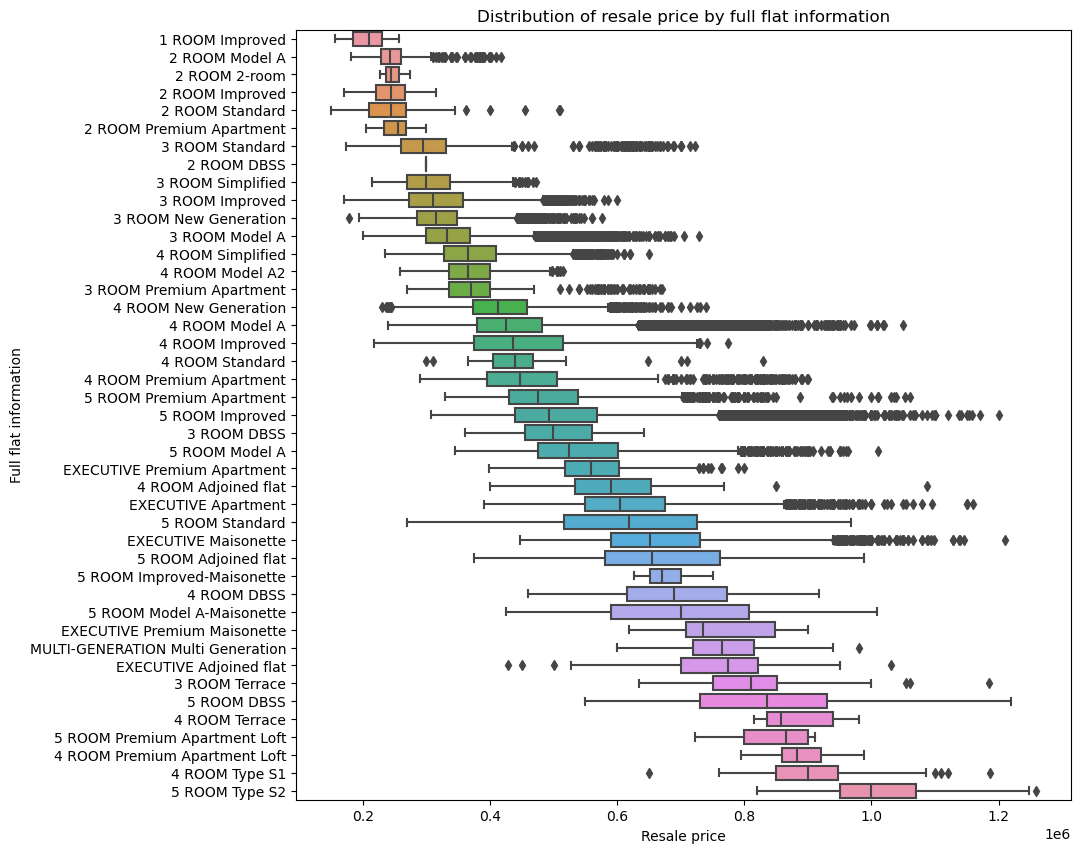

In [11]:
# Distribution of resale price by full flat type shows different median resale price. 

plt.figure(figsize=(10,10))
order = df.groupby("full_flat_type")["resale_price"].median().sort_values().index
sns.boxplot(data=df, x="resale_price", y="full_flat_type", order=order)

plt.xlabel("Resale price")
plt.ylabel("Full flat information")
plt.title("Distribution of resale price by full flat information")
plt.savefig('../visualizations/resale_price_full_flat_type.png', bbox_inches='tight');

Based on the distribution of the resale prices by the full flat information, we can see that there are smaller flat_type (i.e. 3 room) that can fetch up to 1 million resale price. This meant that apart from looking at the flat_type which is categorised by the floor area of the HDB, we should look at the flat model information combined for the prediction of resale price. 

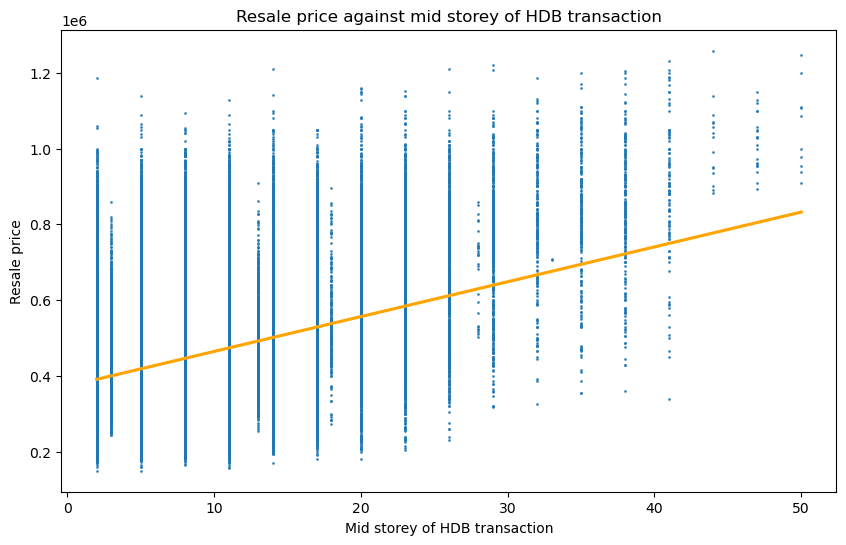

In [12]:
plt.figure(figsize=(10,6))

sns.regplot(data = df, x="mid",y="resale_price", ci = None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})
plt.xlabel('Mid storey of HDB transaction')
plt.ylabel('Resale price')
plt.title('Resale price against mid storey of HDB transaction');

Based on the plot of the resale price against the mid storey, we can see a positive correlation. In general, a higher storey saw a higher resale price. 

In [13]:
df_house_info = df[["resale_price","mid","mid_storey","tranc_year","hdb_age","lease_commence_date","year_completed","flat_model","floor_area_sqft","floor_area_sqm","flat_type"]]
df_house_info.corr()

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_28208/1664385528.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_house_info.corr()


,resale_price,mid,mid_storey,tranc_year,hdb_age,lease_commence_date,year_completed,floor_area_sqft,floor_area_sqm
resale_price,1.000000,0.351821,0.351821,-0.024624,-0.348430,0.348430,0.351802,0.656835,0.656835
mid,0.351821,1.000000,1.000000,0.069984,-0.262267,0.262267,0.265506,0.026170,0.026170
mid_storey,0.351821,1.000000,1.000000,0.069984,-0.262267,0.262267,0.265506,0.026170,0.026170
tranc_year,-0.024624,0.069984,0.069984,1.000000,-0.191934,0.191934,0.195036,0.023473,0.023473
hdb_age,-0.348430,-0.262267,-0.262267,-0.191934,1.000000,-1.000000,-0.988676,-0.289145,-0.289145
lease_commence_date,0.348430,0.262267,0.262267,0.191934,-1.000000,1.000000,0.988676,0.289145,0.289145
year_completed,0.351802,0.265506,0.265506,0.195036,-0.988676,0.988676,1.000000,0.294763,0.294763
floor_area_sqft,0.656835,0.026170,0.026170,0.023473,-0.289145,0.289145,0.294763,1.000000,1.000000
floor_area_sqm,0.656835,0.026170,0.026170,0.023473,-0.289145,0.289145,0.294763,1.000000,1.000000


Based on the correlation information, we can see that the floor_area_sqm and floor_area_sqft have perfect positive correlation (i.e. 1) In addition, mid and mid_storey also have perfect positive correlation (i.e. 1). We will only need one of them in our predictive modelling.

From the correlation information, the floor area_sqm has a strong correlation with resale price and might be an important feature to be used in predictive modelling. 

### Part 2.2: Location
- town
- latitude
- longitude
- postal
- postal sector
- street_name
- block
- Distance to CBD

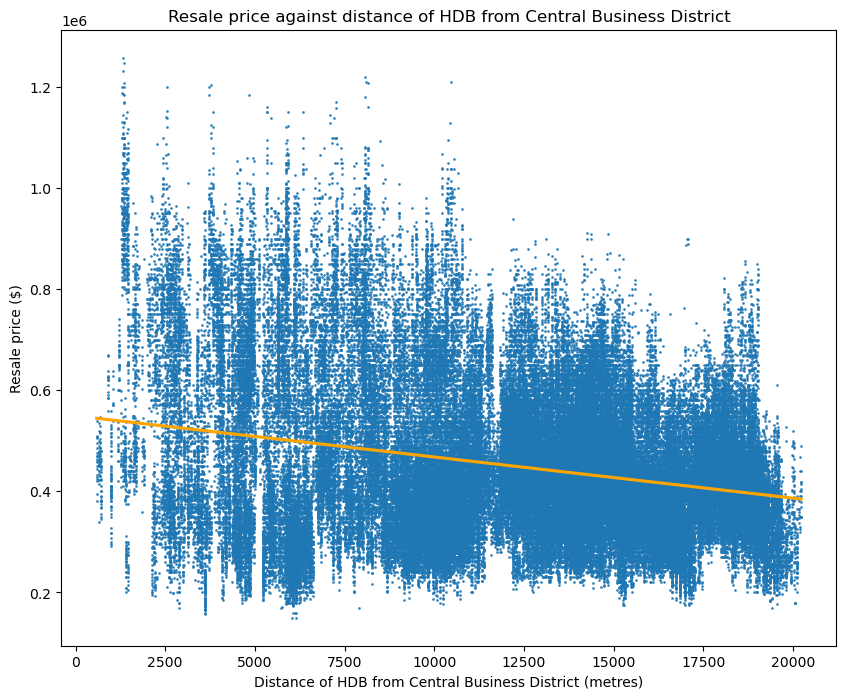

In [14]:
# Scatterplot with linear regression line of resale price against distance of HDB from CBD

plt.figure(figsize=(10,8))

sns.regplot(data = df, x="dist_CBD",y="resale_price", ci = None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'})
plt.xlabel('Distance of HDB from Central Business District (metres)')
plt.ylabel('Resale price ($)')
plt.title('Resale price against distance of HDB from Central Business District');

### Part 2.3: Nearby amenities

Shopping malls in Singapore are a one-stop destination for everything (shopping, food, groceries, services).

- mall nearest distance
- hawker nearest distance

In [15]:
df_ameni = df[['resale_price','mall_nearest_distance','mall_within_500m','mall_within_1km','mall_within_2km','hawker_nearest_distance','hawker_within_500m','hawker_within_1km','hawker_within_2km']]

In [16]:
df_ameni.corr()

,resale_price,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km
resale_price,1.000000,-0.087196,0.087923,0.083874,0.114968,-0.016082,0.013042,0.090734,0.182951
mall_nearest_distance,-0.087196,1.000000,-0.627841,-0.582782,-0.182640,-0.213868,0.106729,0.103437,0.202112
mall_within_500m,0.087923,-0.627841,1.000000,0.513023,0.212072,0.069285,0.024208,0.003067,-0.088106
mall_within_1km,0.083874,-0.582782,0.513023,1.000000,0.436206,0.021674,0.003650,0.038007,-0.072629
mall_within_2km,0.114968,-0.182640,0.212072,0.436206,1.000000,-0.057599,0.187753,0.180706,0.238130
hawker_nearest_distance,-0.016082,-0.213868,0.069285,0.021674,-0.057599,1.000000,-0.529416,-0.605359,-0.595866
hawker_within_500m,0.013042,0.106729,0.024208,0.003650,0.187753,-0.529416,1.000000,0.756725,0.639922
hawker_within_1km,0.090734,0.103437,0.003067,0.038007,0.180706,-0.605359,0.756725,1.000000,0.830104
hawker_within_2km,0.182951,0.202112,-0.088106,-0.072629,0.238130,-0.595866,0.639922,0.830104,1.000000


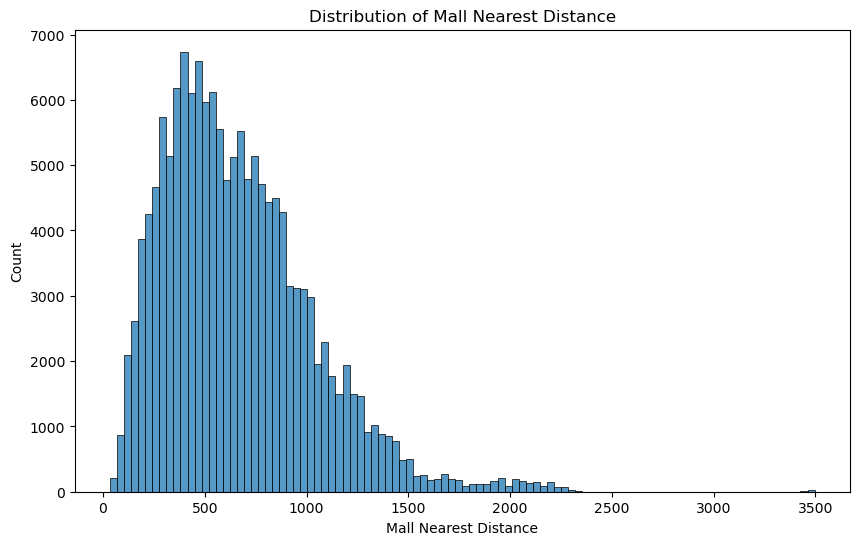

In [17]:
# Distribution of Mall Nearest Distance

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
sns.histplot(data=df_ameni,x="mall_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('Mall Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of Mall Nearest Distance")

# Show the plot
plt.show()

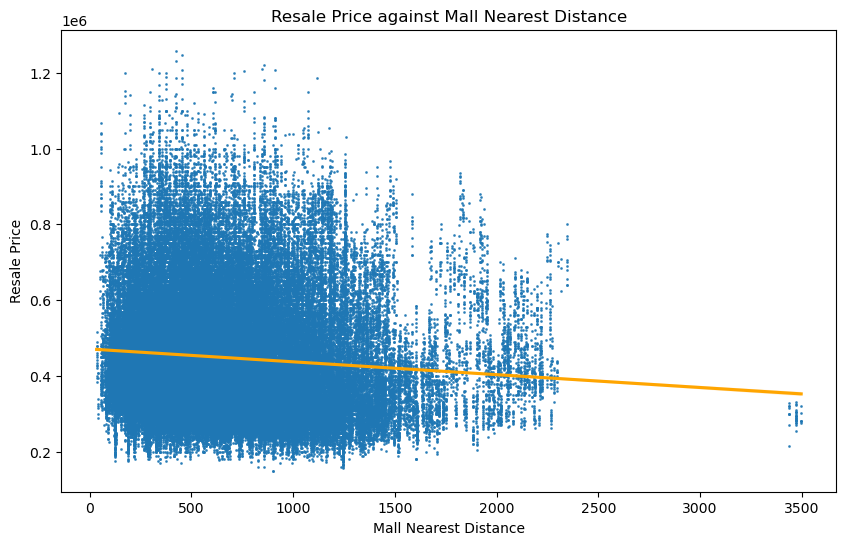

In [18]:
# Scatterplot with linear regression line for Mall Nearest Distance

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
sns.regplot(data=df_ameni,x="mall_nearest_distance", y="resale_price", line_kws = {'color': 'orange'}, scatter_kws={'s': 1})

# Add labels and titles
plt.xlabel('Mall Nearest Distance')
plt.ylabel('Resale Price')
plt.title("Resale Price against Mall Nearest Distance")

#Export the plot as png. Use bbox_inches='tight' to ensure entire heatmap is saved within the image bounds
plt.savefig('../visualizations/scatter_mall_nearest_dist.png', bbox_inches='tight')

# Show the plot
plt.show()

In [19]:
# Locate the postal sector for mall nearest distance >3000m

df_ameni["postal_sector"] = df["postal_sector"]
df_ameni[df_ameni['mall_nearest_distance'] >3000]

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_28208/2018311918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ameni["postal_sector"] = df["postal_sector"]


,resale_price,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,postal_sector
8534,280000.0,3471.145638,0.0,0.0,0.0,176.890682,1.0,1.0,1.0,50
12093,305000.0,3471.145638,0.0,0.0,0.0,176.890682,1.0,1.0,1.0,50
13316,320000.0,3435.307130,0.0,0.0,0.0,136.383625,1.0,1.0,1.0,50
30358,330000.0,3471.145638,0.0,0.0,0.0,176.890682,1.0,1.0,1.0,50
31528,310000.0,3471.145638,0.0,0.0,0.0,176.890682,1.0,1.0,1.0,50
32355,280000.0,3471.145638,0.0,0.0,0.0,176.890682,1.0,1.0,1.0,50
37007,285000.0,3471.145638,0.0,0.0,0.0,176.890682,1.0,1.0,1.0,50
38241,300000.0,3435.307130,0.0,0.0,0.0,136.383625,1.0,1.0,1.0,50
38984,280000.0,3496.402910,0.0,0.0,0.0,105.653140,1.0,1.0,1.0,50
50196,300000.0,3471.145638,0.0,0.0,0.0,176.890682,1.0,1.0,1.0,50


Mall nearest distance follows a fairly normal distribution, slightly positively skewed. 

Generally, flats with presence of nearby malls cost more, and the price decreases as the distance between the flat and mall increases. 

Mall nearest distance > 3000m are all located in postal sector = 50, which is in Changi. This indicates that flats in Changi area has no nearby malls. If buyers prioritise having nearby malls around their house, they should avoid the Changi area.

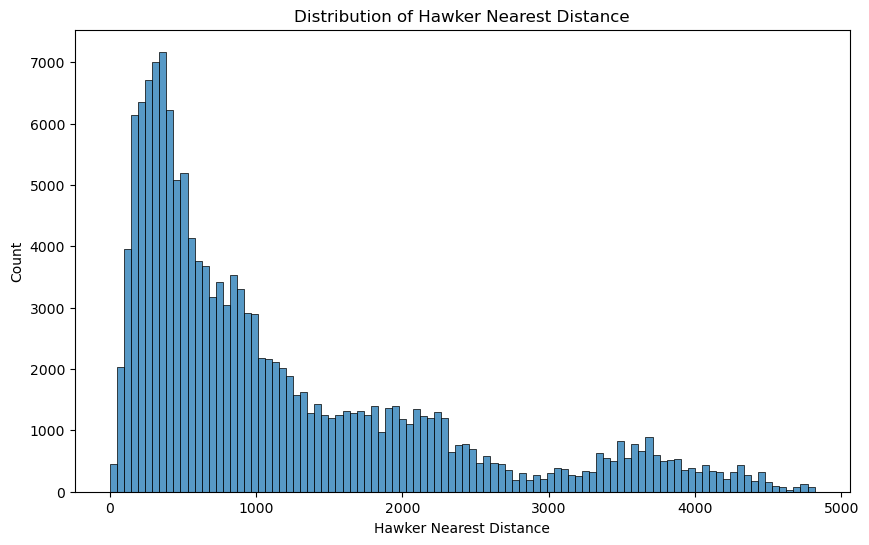

In [20]:
# Distribution of Hawker Nearest Distance

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
sns.histplot(data=df_ameni,x="hawker_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('Hawker Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of Hawker Nearest Distance")

# Show the plot
plt.show()

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_28208/494420256.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ameni["hawker_nearest_dist_log"] = np.log(df_ameni["hawker_nearest_distance"])


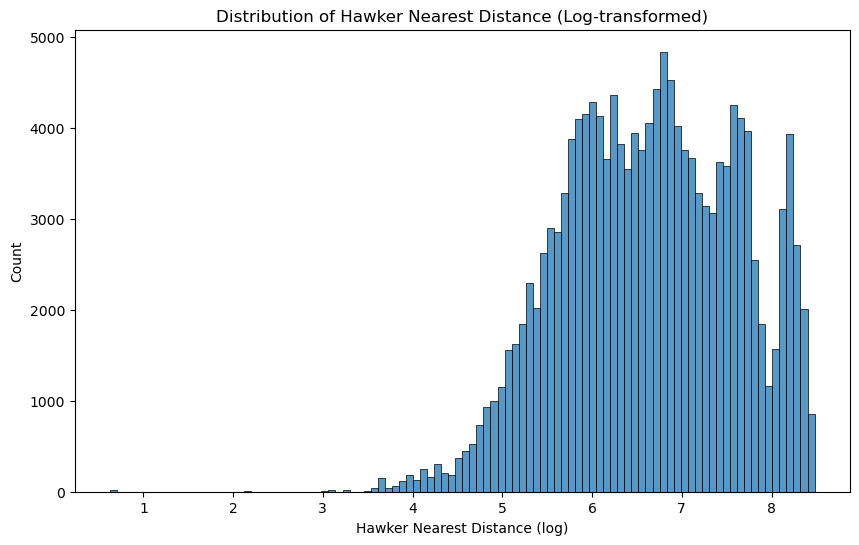

In [21]:
# Distribution of Hawker Nearest Distance (Log-transformed)

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
df_ameni["hawker_nearest_dist_log"] = np.log(df_ameni["hawker_nearest_distance"])
sns.histplot(data=df_ameni,x="hawker_nearest_dist_log", bins=100)

# Add labels and titles
plt.xlabel('Hawker Nearest Distance (log)')
plt.ylabel('Count')
plt.title("Distribution of Hawker Nearest Distance (Log-transformed)")

# Show the plot
plt.show()

In [22]:
df_ameni.corr()

,resale_price,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,postal_sector,hawker_nearest_dist_log
resale_price,1.000000,-0.087196,0.087923,0.083874,0.114968,-0.016082,0.013042,0.090734,0.182951,-0.231039,0.004718
mall_nearest_distance,-0.087196,1.000000,-0.627841,-0.582782,-0.182640,-0.213868,0.106729,0.103437,0.202112,-0.178989,-0.199109
mall_within_500m,0.087923,-0.627841,1.000000,0.513023,0.212072,0.069285,0.024208,0.003067,-0.088106,0.024775,0.042955
mall_within_1km,0.083874,-0.582782,0.513023,1.000000,0.436206,0.021674,0.003650,0.038007,-0.072629,-0.038814,0.005425
mall_within_2km,0.114968,-0.182640,0.212072,0.436206,1.000000,-0.057599,0.187753,0.180706,0.238130,-0.293640,-0.116765
hawker_nearest_distance,-0.016082,-0.213868,0.069285,0.021674,-0.057599,1.000000,-0.529416,-0.605359,-0.595866,0.498082,0.891852
hawker_within_500m,0.013042,0.106729,0.024208,0.003650,0.187753,-0.529416,1.000000,0.756725,0.639922,-0.511442,-0.727227
hawker_within_1km,0.090734,0.103437,0.003067,0.038007,0.180706,-0.605359,0.756725,1.000000,0.830104,-0.666387,-0.739567
hawker_within_2km,0.182951,0.202112,-0.088106,-0.072629,0.238130,-0.595866,0.639922,0.830104,1.000000,-0.739788,-0.676742
postal_sector,-0.231039,-0.178989,0.024775,-0.038814,-0.293640,0.498082,-0.511442,-0.666387,-0.739788,1.000000,0.544592


The distribution for hawker nearest distance before and after log transformation appear to be less normally distributed as compared to mall nearest distance, and hence would not be appropriate for linear regression. 
As such, for amenities that affect the resale price and to be included in the model, we only selected mall nearest distance. Malls would also have a variety of food options as well. 

### Part 2.4: Accessibility

Accessibility is the distance to the nearest MRT or bus stop, which is an indicator of how well-connected the HDB flat is to the transport.

- mrt_nearest_distance
- bus_stop_nearest_distance

In [23]:
df_access = df[['resale_price','mrt_name','mrt_nearest_distance','bus_stop_nearest_distance']]

In [24]:
df_access.corr()

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_28208/3463022240.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_access.corr()


,resale_price,mrt_nearest_distance,bus_stop_nearest_distance
resale_price,1.000000,-0.127947,0.030565
mrt_nearest_distance,-0.127947,1.000000,0.041457
bus_stop_nearest_distance,0.030565,0.041457,1.000000


Correlation coefficient of mrt nearest distance is higher than bus stop nearest distance, indicating mrt nearest distance has a higher linear correlation with resale price.

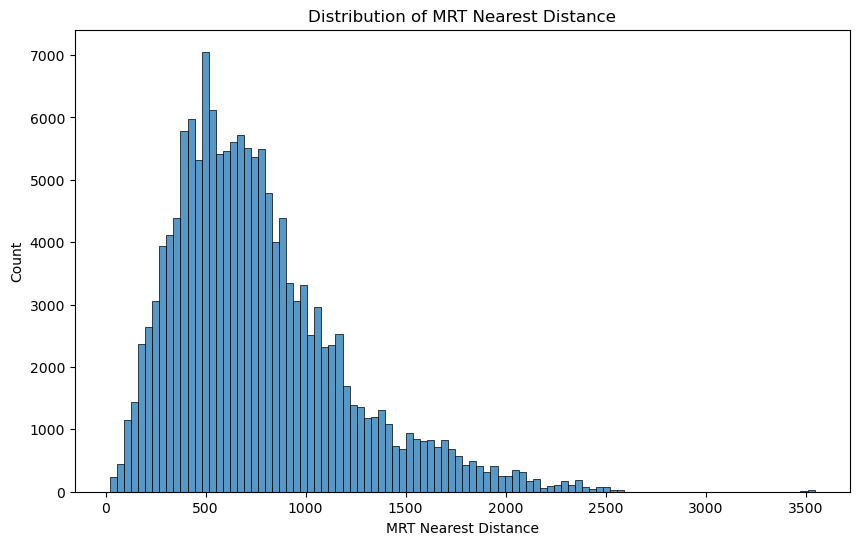

In [25]:
# Distribution of Mrt Nearest Distance

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
sns.histplot(data=df_access,x="mrt_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('MRT Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of MRT Nearest Distance")


# Show the plot
plt.show()

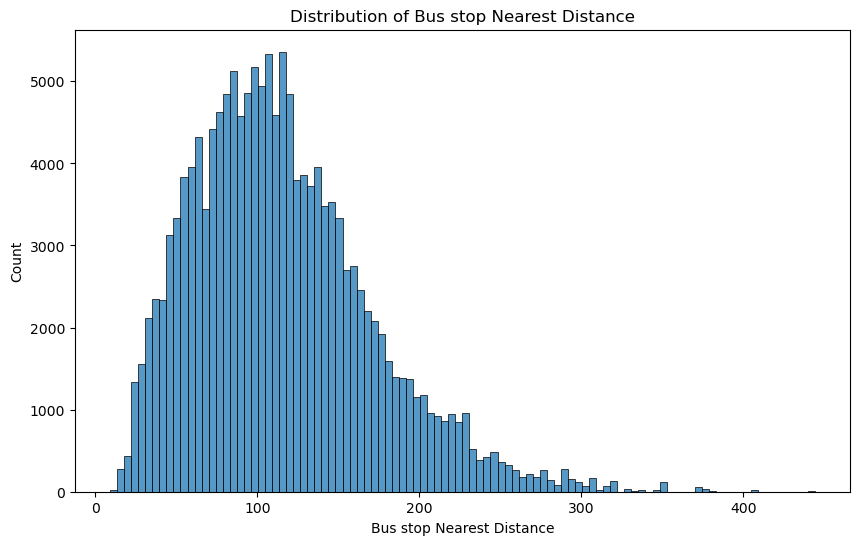

In [26]:
# Distribution of Bus stop Nearest Distance

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
sns.histplot(data=df_access,x="bus_stop_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('Bus stop Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of Bus stop Nearest Distance")


# Show the plot
plt.show()

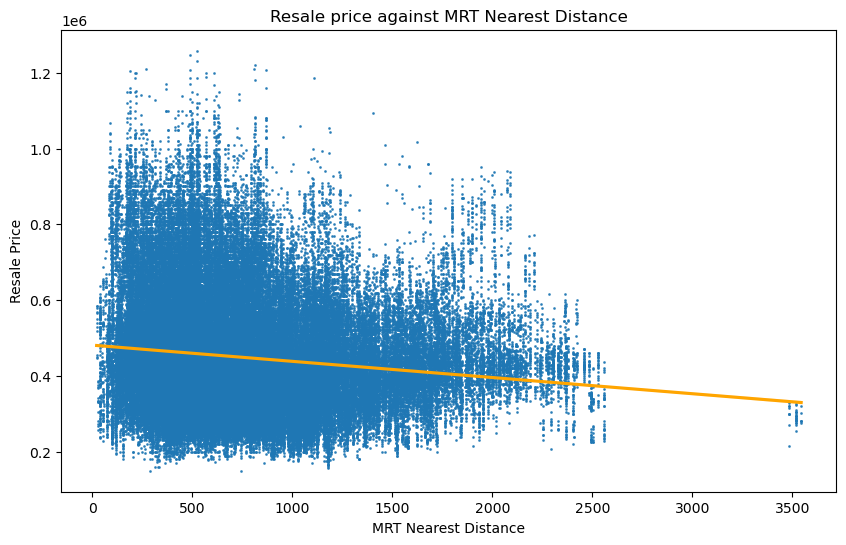

In [27]:
# Scatterplot with linear regression line of MRT Nearest Distance

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
sns.regplot(data=df_access,x="mrt_nearest_distance", y="resale_price", line_kws = {'color': 'orange'}, scatter_kws={'s': 1})

# Add labels and titles
plt.xlabel('MRT Nearest Distance')
plt.ylabel('Resale Price')
plt.title("Resale price against MRT Nearest Distance")


plt.savefig('../visualizations/scatter_mrt_nearest_dist.png', bbox_inches='tight')

# Show the plot
plt.show()

In [28]:
# Locate the postal sector for mall nearest distance >3000m

df_access["postal_sector"] = df["postal_sector"]
df_access[df_access["mrt_nearest_distance"] > 3000]

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_28208/4050977139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_access["postal_sector"] = df["postal_sector"]


,resale_price,mrt_name,mrt_nearest_distance,bus_stop_nearest_distance,postal_sector
8534,280000.0,Changi Airport,3517.814536,56.113235,50
12093,305000.0,Changi Airport,3517.814536,56.113235,50
13316,320000.0,Changi Airport,3483.769534,67.559663,50
30358,330000.0,Changi Airport,3517.814536,56.113235,50
31528,310000.0,Changi Airport,3517.814536,56.113235,50
32355,280000.0,Changi Airport,3517.814536,56.113235,50
37007,285000.0,Changi Airport,3517.814536,56.113235,50
38241,300000.0,Changi Airport,3483.769534,67.559663,50
38984,280000.0,Changi Airport,3544.504228,21.737868,50
50196,300000.0,Changi Airport,3517.814536,56.113235,50


MRT nearest distance follows a fairly normal distribution, slightly positively skewed. 

Generally, flats near MRT station cost more, and the price decreases as it gets further away from the MRT station.  

MRT nearest distance > 3000m are all located in postal sector = 50, which is in Changi. This indicates that flats in Changi area are far from the MRT station and may not be easily accessible via MRT. If buyers prioritise having nearby transportation, they should avoid the Changi area.


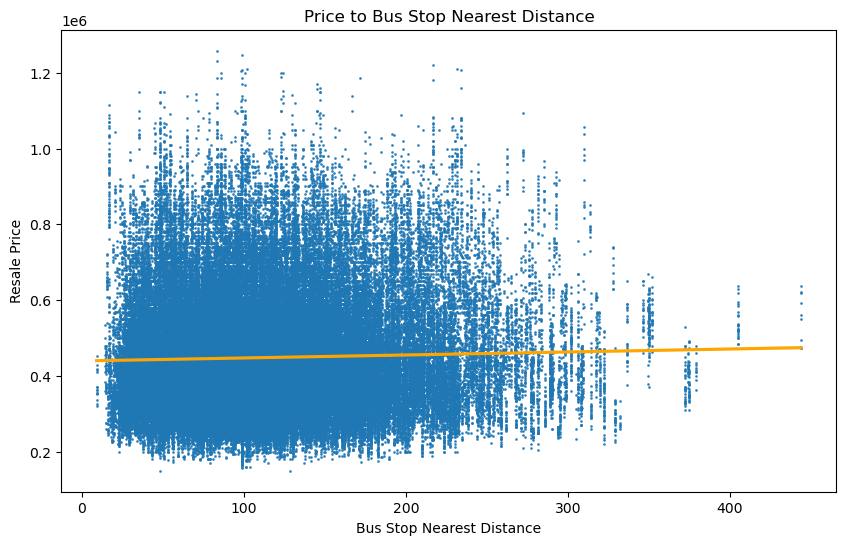

In [29]:
# Scatterplot with linear regression line of bus stop Nearest Distance

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
sns.regplot(data=df_access,x="bus_stop_nearest_distance", y="resale_price", line_kws = {'color': 'orange'}, scatter_kws={'s': 1})

# Add labels and titles
plt.xlabel('Bus Stop Nearest Distance')
plt.ylabel('Resale Price')
plt.title("Price to Bus Stop Nearest Distance")


# Show the plot
plt.show()

It is a surprising find that there is no inverse relationship and no strong linear relationship between resale price and bus stop nearest distance. As such this is not included in our feature selection.

### Part 2.5: Nearby Primary Schools

Having a Primary School nearby could be a great convenience for parents as their young children have the option to walk home after school instead of making alternative transport arrangements.

In [30]:
df_sch = df[['resale_price','pri_sch_nearest_distance']]

In [31]:
df_sch.corr()

,resale_price,pri_sch_nearest_distance
resale_price,1.000000,-0.010867
pri_sch_nearest_distance,-0.010867,1.000000


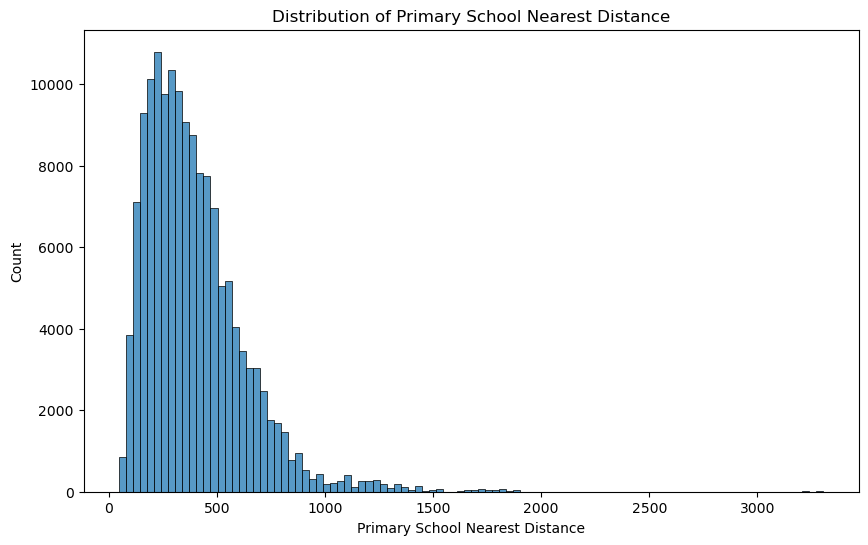

In [32]:
# Distribution of Primary School Nearest Distance

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
sns.histplot(data=df_sch,x="pri_sch_nearest_distance", bins=100)

# Add labels and titles
plt.xlabel('Primary School Nearest Distance')
plt.ylabel('Count')
plt.title("Distribution of Primary School Nearest Distance")

# Show the plot
plt.show()

In primary school admission, if the chosen primary school has more registrants than vacancies, priority admission will be given based on the child's citizenship and the Home-School Distance category in this order:
- living within 1km of the school
- living between 1km and 2km of the school
- living outside 2km of the school

As such, we grouped our data accordingly to the same cateogories for further EDA.

In [33]:
# Define the conditions and labels
conditions = [
    (df_sch['pri_sch_nearest_distance'] <= 1000),
    (df_sch['pri_sch_nearest_distance'] > 1000) & (df_sch['pri_sch_nearest_distance'] <= 2000),
    (df_sch['pri_sch_nearest_distance'] > 2000)
]

labels = ['<=1000', 'between 1000 and 2000', '>2000']

# Use numpy's select function to create the new column based on conditions and labels
df_sch['pri_sch_distance_cat'] = np.select(conditions, labels, default='Unknown')

# Print the updated DataFrame
df_sch.head()

/var/folders/x4/4jp1nhs55ml3v5bgr6ydzjvc0000gn/T/ipykernel_28208/355999197.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sch['pri_sch_distance_cat'] = np.select(conditions, labels, default='Unknown')


,resale_price,pri_sch_nearest_distance,pri_sch_distance_cat
0,680000.0,1138.633422,between 1000 and 2000
1,665000.0,415.607357,<=1000
2,838000.0,498.849039,<=1000
3,550000.0,389.515528,<=1000
4,298000.0,401.200584,<=1000


In [34]:
df_sch_cat = df_sch
df_sch_cat = pd.get_dummies(data=df_sch_cat, columns=['pri_sch_distance_cat'])

In [35]:
df_sch_cat.corr()

,resale_price,pri_sch_nearest_distance,pri_sch_distance_cat_<=1000,pri_sch_distance_cat_>2000,pri_sch_distance_cat_between 1000 and 2000
resale_price,1.000000,-0.010867,0.008917,-0.017224,-0.007075
pri_sch_nearest_distance,-0.010867,1.000000,-0.567309,0.195021,0.549142
pri_sch_distance_cat_<=1000,0.008917,-0.567309,1.000000,-0.106948,-0.994010
pri_sch_distance_cat_>2000,-0.017224,0.195021,-0.106948,1.000000,-0.002359
pri_sch_distance_cat_between 1000 and 2000,-0.007075,0.549142,-0.994010,-0.002359,1.000000


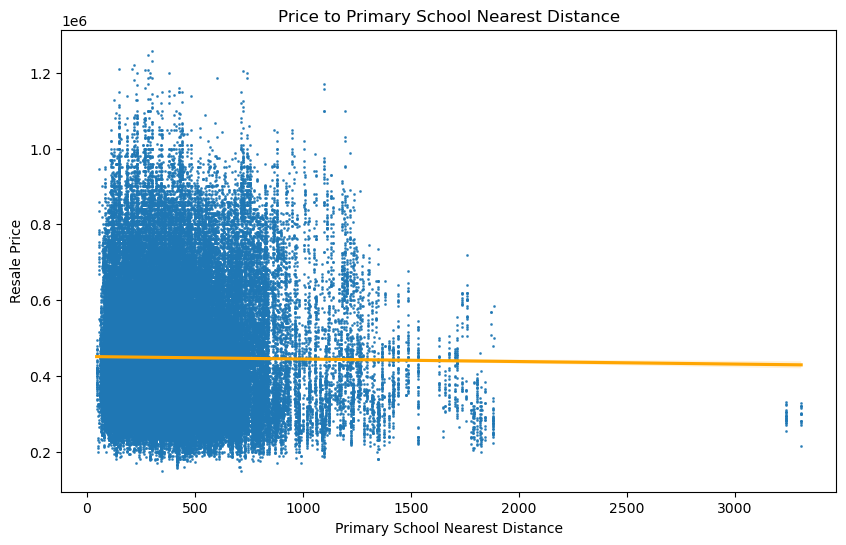

In [36]:
# Scatterplot with linear regression line of primary school Nearest Distance

# Set the figure size
plt.figure(figsize=(10,6))

# Create the histogram
sns.regplot(data=df_sch_cat,x="pri_sch_nearest_distance", y="resale_price", line_kws = {'color': 'orange'}, scatter_kws={'s': 1})

# Add labels and titles
plt.xlabel('Primary School Nearest Distance')
plt.ylabel('Resale Price')
plt.title("Price to Primary School Nearest Distance")

plt.savefig('../visualizations/scatter_pri_nearest_dist.png', bbox_inches='tight')

# Show the plot
plt.show()

We did not see an improvement in correlation coefficient after grouping the distance into 3 categories. This indicate that homeowners were not prioritising having a nearby primary school when buying homes. This could be due to the various phases involved in primary school registration balloting, where the living distance to the school only happens in the third phase. As such, we did not select this feature.

## Based on the above EDA, we selected a total of 9 key features for modelling 

1)"tranc_year"
<br>2)"floor_area_sqm"
<br>3)"hdb_age"
<br>4)"full_flat_type"
<br>5)"mrt_nearest_distance"
<br>6)"mall_nearest_distance"
<br>7)"postal_sector"
<br>8)"dist_CBD"
<br>9)"mid"

[Click to proceed to next notebook for data modelling](03_Modelling_final.ipynb)